In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
def spec(path, sample):
    pal = 'viridis'
    col = ["Frequency (Hz)", "Z'", "-Z''", "Fit Frequency (Hz)", "Fit Z'", "Fit -Z''" ]
    files = [os.path.join(path, i) for i in os.listdir(path) if 'spectra' in i] # Check file name
    spectra = pd.DataFrame()
    n = 0
    for i in files:   
        df_s = pd.read_csv(i, skiprows=4, sep = '\t', names=col)

        df_s[col[2]] = -df_s[col[2]]
        df_s[col[5]] = -df_s[col[5]]
        df_s['Run'] = n
        spectra = pd.concat([spectra, df_s], ignore_index=True)
        n += 1

    fig, ax = plt.subplots(dpi = 200)
    sns.scatterplot(data = spectra, x = col[1], y = col[2], legend = False, hue = 'Run', palette=pal)
    sns.lineplot(data = spectra, x = col[4], y = col[5],  hue = 'Run', legend = False, palette=pal)
    plt.title(sample)
    
    return spectra

def data_fit(path, sample):
    spectra = [os.path.join(path, i) for i in os.listdir(path) if 'Spectra' in i]
    fit = [os.path.join(path, i) for i in os.listdir(path) if 'Fit' in i]
    col = ["Frequency Hz",	"Z' ($\Omega$)",	"-Z'' ($\Omega$)",	"Fit Frequency (Hz)",	"Fit Z' ($\Omega$)",	"Fit -Z'' ($\Omega$)"]
    df = pd.read_csv(spectra[0], sep = '\t', skiprows = 4, names = col)
    df[col[2]] = -df[col[2]]
    df[col[5]] = -df[col[5]]
    fig, ax = plt.subplots(dpi = 100)
    sns.scatterplot(data = df, x =col[1], y = col[2])
    sns.lineplot(data = df, x = col[4], y = col[5])
    
    fit_values = pd.read_csv(fit[0], sep = '\t', skiprows = 2) 
    return df, fit_values
    

0    4.405793e-07
Name: Resistance 1: value, dtype: float64

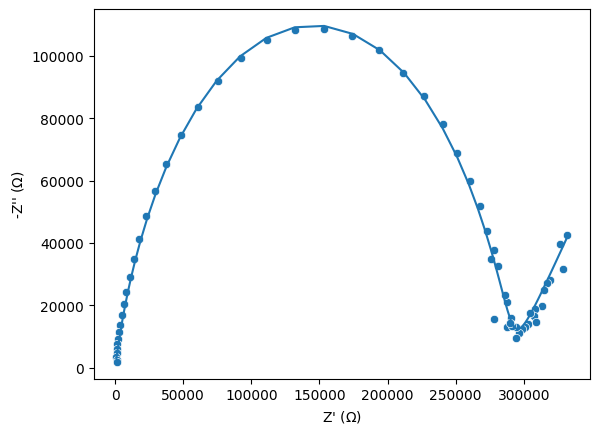

In [41]:
sample = 'Li TFSI:BMP TFSI  2:1'
thickness = 0.1 # cm
area = np.pi * 0.5**2 # cm2
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Impedance\Solid Electrolyte\Comeback\BMP LiTFSI\1_2\Good signal'
fit, values = data_fit(path, sample)
electrolyte_r = values['Resistance 1: value']
conductivity = thickness / (electrolyte_r *area)  #thickness/area*resistance
conductivitys